# Caffe Neural Net Tutorial

This is a Notebook execution of the Caffe Tutorial:
http://christopher5106.github.io/deep/learning/2015/09/04/Deep-learning-tutorial-on-Caffe-Technology.html

### Load Training Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import caffe
from IPython.display import Image as I_Image

In [2]:
caffe.set_mode_gpu()

In [3]:
#Build neural net from prototext file
net = caffe.Net('sample.prototxt', caffe.TEST)

In [17]:
print net.inputs

# Display out layers with respective shapes
[(k, v.data.shape) for k, v in net.blobs.items()]

['data']


[('data', (1L, 1L, 100L, 100L)), ('conv', (1L, 3L, 96L, 96L))]

In [18]:
# Display weight & bias parameters
[(k, v[0].data.shape, v[1].data.shape) for k, v in net.params.items()]

[('conv', (3L, 1L, 5L, 5L), (3L,))]

In [19]:
print net.blobs['conv'].data.shape

(1L, 3L, 96L, 96L)


### Draw Neural Network

Drawing net to my_net.png


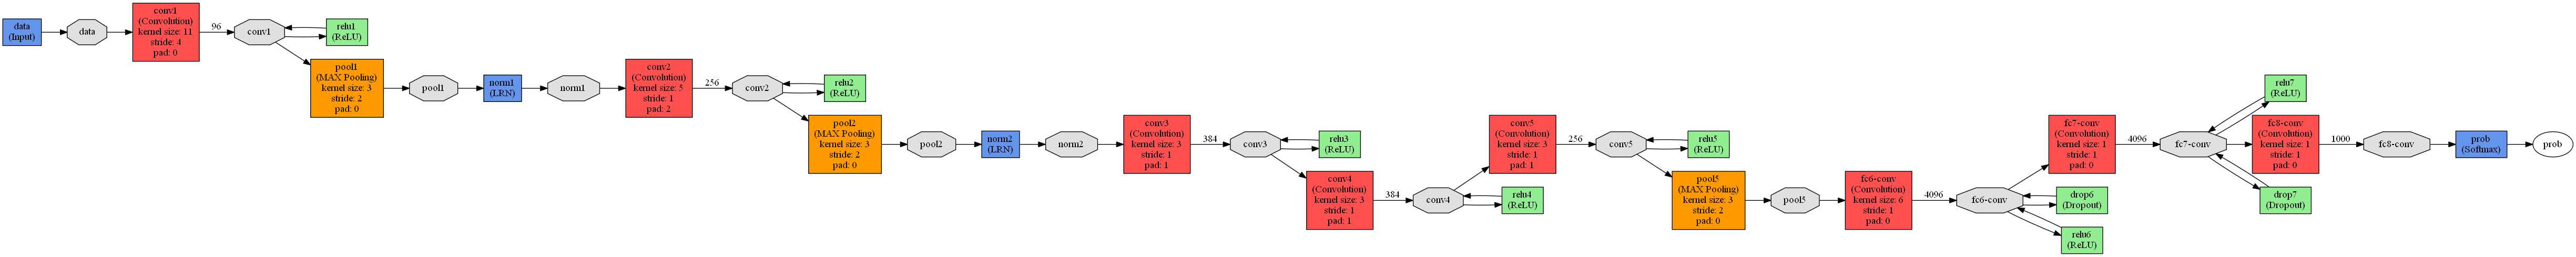

In [26]:
# Draw script: C:\Program Files\caffe-master\Build\x64\Release\pycaffe\draw_net.py
# Net file: C:\Program Files\caffe-master\examples\net_surgery\conv.prototxt

! python "C:\Program Files\caffe-master\Build\x64\Release\pycaffe\draw_net.py"\
         "C:\Program Files\caffe-master\examples\net_surgery\bvlc_caffenet_full_conv.prototxt"\
          my_net.png

I_Image(filename = "my_net.png")

### Load & Prepare Training Data

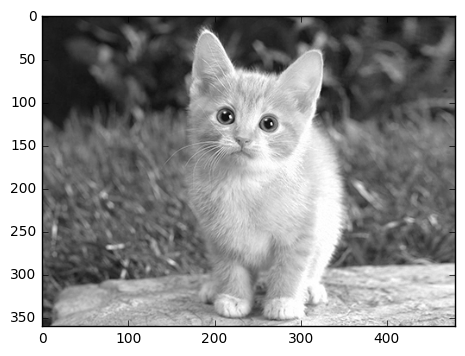

In [4]:
im = np.array(Image.open('C:/Program Files/caffe-master/examples/images/cat_gray.jpg'))
plt.imshow(im,cmap = 'gray')
plt.show()

In [5]:
#Reshape the data blob (1, 1, 100, 100) to the new size (1, 1, 360, 480) to fit the image
im_input = im[np.newaxis, np.newaxis, :, :]
net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input

net.blobs['data'].data.shape

(1L, 1L, 360L, 480L)

In [6]:
#Compute blobs given input
net.forward()

{'conv': array([[[[-0.8592214 , -0.75151628, -0.65139306, ..., -1.84722126,
           -1.74115992, -1.65409839],
          [-0.79427975, -0.82196099, -0.78914553, ..., -1.85161221,
           -1.80299807, -1.75583971],
          [-0.71490663, -0.69462687, -0.7919485 , ..., -1.96602488,
           -1.98208809, -1.89058793],
          ..., 
          [-1.26459455, -1.05858898, -1.06539464, ..., -5.78412533,
           -6.74463272, -6.62098646],
          [-1.23982382, -1.14569831, -1.11366749, ..., -7.02306938,
           -6.77109718, -5.72034311],
          [-1.06741285, -1.13613701, -1.304021  , ..., -7.84046507,
           -6.83272743, -6.41513062]],
 
         [[-0.54991668, -0.62016481, -0.70514166, ..., -1.25217044,
           -1.13673639, -1.16900361],
          [-0.61473894, -0.58007979, -0.61381125, ..., -1.3815763 ,
           -1.25817001, -1.24715841],
          [-0.6401487 , -0.65949368, -0.67727602, ..., -1.43020952,
           -1.31898916, -1.28231359],
          ..., 
   

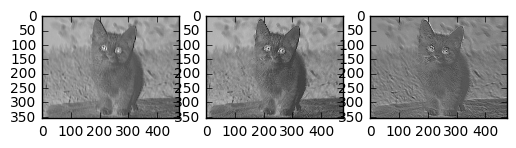

In [21]:
#Print convolutions
for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(net.blobs['conv'].data[0,i], cmap = 'gray')

plt.show()

### Download Pre-Trained Model

In [ ]:
# Download Model script: C:/Program Files/caffe-master/scripts/download_model_binary.py
# Download Model script from Gist: C:/Program Files/caffe-master/scripts/download_model_binary.py
# Location to save pre-trained model: C:/Program Files/caffe-master/models/bvlc_reference_caffenet

 models/bvlc_reference_caffenet
